# ANÁLISIS EXPLORATORIO DE DATOS

En este Jupyter Notebook se hará un análisis en profundidad de los datos con los que se cuenta para la realización de este estudio. Para ello contamos con cuatro libros de Excel que contienen los datos de las notas y datos de Aula Global de los alumnos de cuatro grupos del curso 2021/2022 de la asignatura Programación.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [21]:
df_train_datos = './Datos_TFG_originales/datos_correctos/datos_81_89_96.xlsx'
df1_train = pd.read_excel(df_train_datos)
df1_train.head()

,login_est,fecha,hora,moodle_component,moodle_resource_nombre,moodle_action,moodle_target
0,59,2021-08-30,16:59:30,core,NaN,viewed,course
1,59,2021-08-30,17:05:30,core,NaN,viewed,course
2,78,2021-08-30,10:27:35,core,NaN,viewed,course
3,78,2021-08-30,10:27:40,gradereport_user,NaN,viewed,grade_report
4,78,2021-08-30,20:01:09,core,NaN,viewed,course


In [22]:
df_test_datos = './Datos_TFG_originales/datos_correctos/datos_84.xlsx'
df1_test = pd.read_excel(df_test_datos)
df1_test.head()

,login_est,fecha,hora,moodle_component,moodle_resource_nombre,moodle_action,moodle_target
0,137,2021-08-30,11:05:24,core,NaN,viewed,course
1,137,2021-08-30,11:15:31,core,NaN,viewed,course
2,137,2021-08-30,11:17:12,core,NaN,viewed,course
3,137,2021-08-30,11:05:32,mod_url,NaN,viewed,course_module
4,144,2021-08-30,07:35:19,core,NaN,viewed,course


In [23]:
df_train_notas = './Datos_TFG_originales/datos_correctos/notas_81_89_96.xlsx'
df2_train = pd.read_excel(df_train_notas)
df2_train.head()

,Identificador,Course total,nota_final_aprobado,wooclap_week2,wooclap_week3,wooclap_week4,wooclap_week5
0,1,4.50,NO,100,100,0,100
1,2,6.80,SI,100,100,50,75
2,3,8.53,SI,100,75,75,100
3,4,8.58,SI,80,75,75,50
4,5,9.36,SI,100,75,100,100


In [24]:
df_test_notas = './Datos_TFG_originales/datos_correctos/notas_84.xlsx'
df2_test = pd.read_excel(df_test_notas)
df2_test.head()

,Identificador,Course total,nota_final_aprobado,wooclap_week2,wooclap_week3,wooclap_week4,wooclap_week5
0,130,4.611,NO,20,25,75,50
1,131,5.231,SI,60,75,0,0
2,132,5.340,SI,60,100,25,75
3,133,4.511,NO,40,50,75,75
4,134,3.519,NO,40,50,0,25


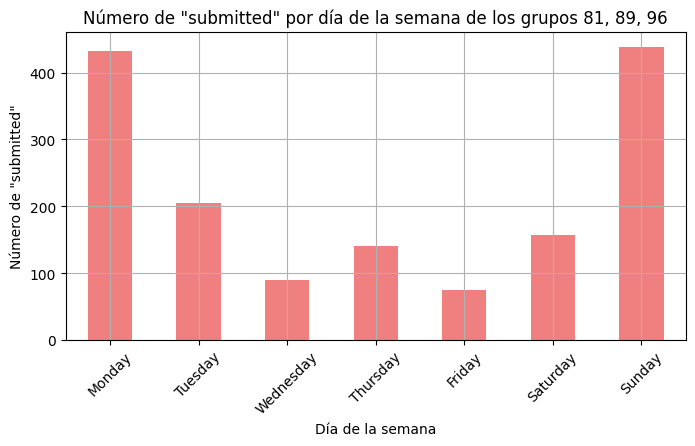

In [25]:
#Para poder hacer el gráfico del número de submitted que se hacen por día de la semana, se tiene que pasar primero a datetime la columna 'fecha' y posteriormente extraer el dia de la semana de la columna.
df1_train['fecha'] = pd.to_datetime(df1_train['fecha'])
df1_train['dia_semana'] = df1_train['fecha'].dt.day_name()
#Después se filtra por la acción 'submitted' el atributo moodle_action
submitted_df_train = df1_train[df1_train['moodle_action'] == 'submitted']
#Se cuenta los 'submitted' por día de la semana con value_counts
submitted_dia_train = submitted_df_train['dia_semana'].value_counts().sort_index()
#Con este paso, se reordenan los días de la semana para que salgan en orden en el gráfico
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
submitted_por_dia_train = submitted_dia_train.reindex(dias)
#Se construye y muestra el gráfico de barras del número de 'submitted' por día de la semana de los grupos 81, 89 y 96
plt.figure(figsize=(8, 4))
submitted_por_dia_train.plot(kind='bar', color='lightcoral')
plt.title('Número de "submitted" por día de la semana de los grupos 81, 89, 96')
plt.xlabel('Día de la semana')
plt.ylabel('Número de "submitted"')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

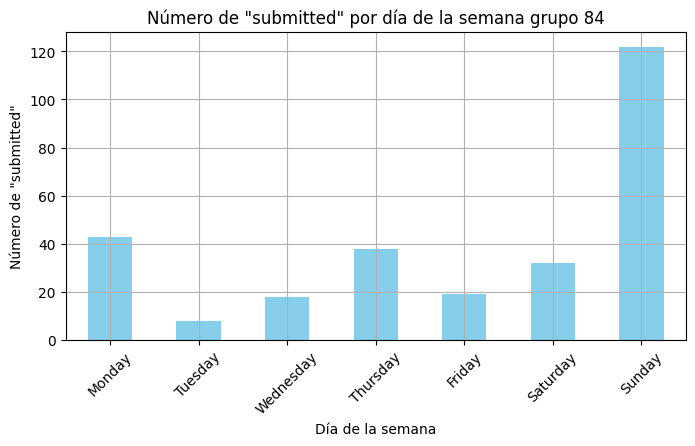

In [26]:
#Como en el gráfico anterior, para poder hacer el gráfico del número de submitted que se hacen por día de la semana, se tiene que pasar primero a datetime la columna 'fecha' y posteriormente extraer el 
#dia de la semana de la columna.
df1_test['fecha'] = pd.to_datetime(df1_test['fecha'])
df1_test['dia_semana'] = df1_test['fecha'].dt.day_name()
#Se filtra por la acción 'submitted' el atributo moodle_action
submitted_df_test = df1_test[df1_test['moodle_action'] == 'submitted']
##Se cuentan los 'submitted' por día de la semana con value_counts
submitted_dia_test = submitted_df_test['dia_semana'].value_counts().sort_index()
#Se reordenan los días de la semana para que salgan en orden en el gráfico
submitted_por_dia_test = submitted_dia_test.reindex(dias)
#Se construye y muestra el gráfico de barras del número de 'submitted' por día de la semana del grupo 84
plt.figure(figsize=(8, 4))
submitted_por_dia_test.plot(kind='bar', color='skyblue')
plt.title('Número de "submitted" por día de la semana grupo 84')
plt.xlabel('Día de la semana')
plt.ylabel('Número de "submitted"')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

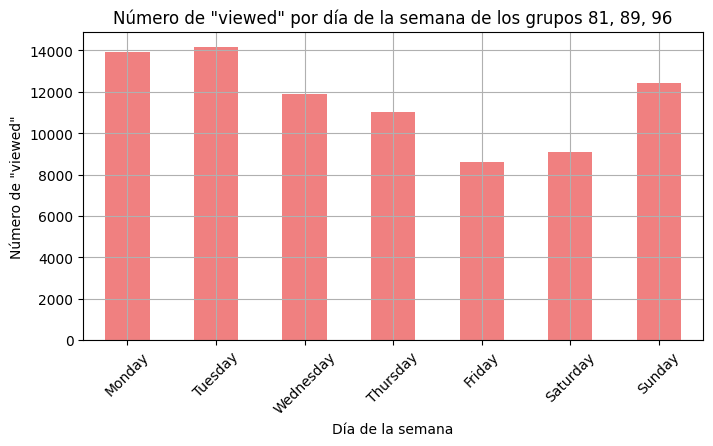

In [27]:
#Para poder hacer el gráfico del número de viewed que se hacen por día de la semana, se tiene que pasar primero a datetime la columna 'fecha' y posteriormente extraer el dia de la semana de la columna.
df1_train['fecha'] = pd.to_datetime(df1_train['fecha'])
df1_train['dia_semana'] = df1_train['fecha'].dt.day_name()
#Después se filtra por la acción 'viewed' el atributo moodle_action
submitted_df_train = df1_train[df1_train['moodle_action'] == 'viewed']
#Se cuenta los 'viewed' por día de la semana con value_counts
submitted_dia_train = submitted_df_train['dia_semana'].value_counts().sort_index()
#Con este paso, se reordenan los días de la semana para que salgan en orden en el gráfico
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
submitted_por_dia_train = submitted_dia_train.reindex(dias)
#Se construye y muestra el gráfico de barras del número de 'viewed' por día de la semana de los grupos 81, 89 y 96
plt.figure(figsize=(8, 4))
submitted_por_dia_train.plot(kind='bar', color='lightcoral')
plt.title('Número de "viewed" por día de la semana de los grupos 81, 89, 96')
plt.xlabel('Día de la semana')
plt.ylabel('Número de "viewed"')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

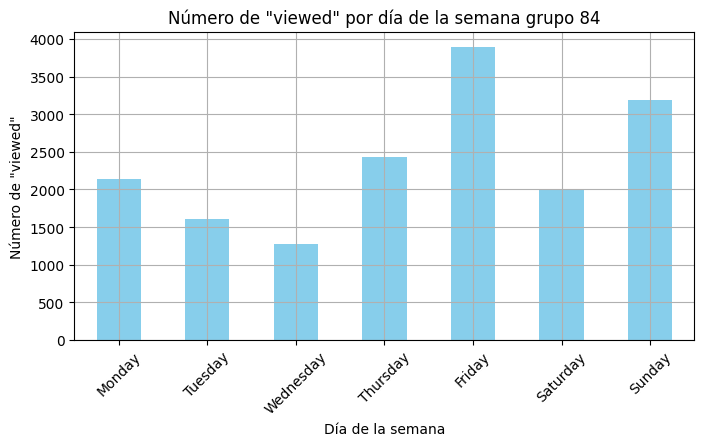

In [28]:
#Como en el gráfico anterior, para poder hacer el gráfico del número de submitted que se hacen por día de la semana, se tiene que pasar primero a datetime la columna 'fecha' y posteriormente extraer el 
#dia de la semana de la columna.
df1_test['fecha'] = pd.to_datetime(df1_test['fecha'])
df1_test['dia_semana'] = df1_test['fecha'].dt.day_name()
#Se filtra por la acción 'viewed' el atributo moodle_action
submitted_df_test = df1_test[df1_test['moodle_action'] == 'viewed']
##Se cuentan los 'viewed' por día de la semana con value_counts
submitted_dia_test = submitted_df_test['dia_semana'].value_counts().sort_index()
#Se reordenan los días de la semana para que salgan en orden en el gráfico
submitted_por_dia_test = submitted_dia_test.reindex(dias)
#Se construye y muestra el gráfico de barras del número de 'viewed' por día de la semana del grupo 84
plt.figure(figsize=(8, 4))
submitted_por_dia_test.plot(kind='bar', color='skyblue')
plt.title('Número de "viewed" por día de la semana grupo 84')
plt.xlabel('Día de la semana')
plt.ylabel('Número de "viewed"')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

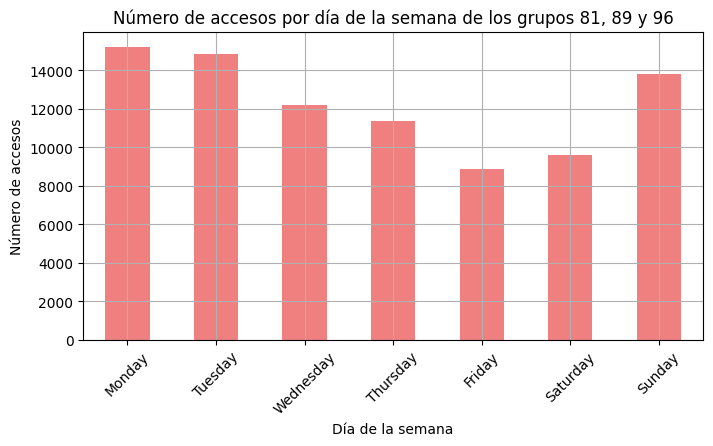

In [29]:
#Se cuentan los accesos por día de la semana con value_counts().
accesos_por_dia_train = df1_train['dia_semana'].value_counts().reindex(dias)
#Se construye y se muestra el gráfico de barras que muestra el número de accesos por día de la semana de la clase 84.
plt.figure(figsize=(8, 4))
accesos_por_dia_train.plot(kind='bar', color='lightcoral')
plt.title('Número de accesos por día de la semana de los grupos 81, 89 y 96')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accesos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

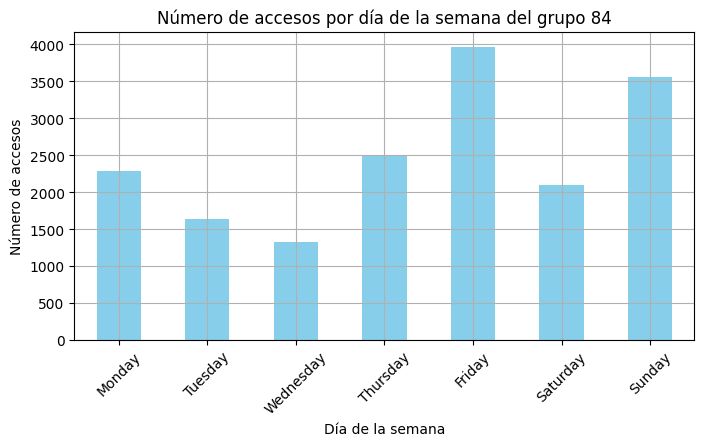

In [30]:
#Se cuentan los accesos por día de la semana con value_counts().
accesos_dia_test = df1_test['dia_semana'].value_counts().reindex(dias)
#Se construye y se muestra el gráfico de barras que muestra el número de accesos por día de la semana del grupo 84.
plt.figure(figsize=(8, 4))
accesos_dia_test.plot(kind='bar', color='skyblue')
plt.title('Número de accesos por día de la semana del grupo 84')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accesos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

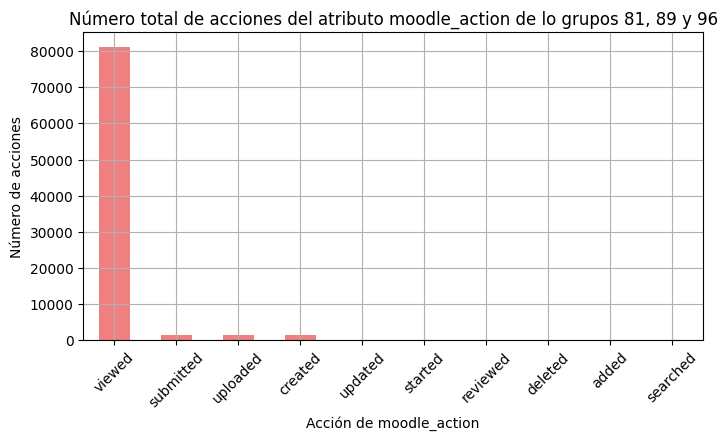

In [31]:
#Se cuentan los diferentes valores del atributo moodle_action.
acciones_train = df1_train['moodle_action'].value_counts()
#Se construye y se muestra el gráfico de barras del número total de cada acción del atributo moodle_action de los grupos 81, 89 y 96
plt.figure(figsize=(8, 4))
acciones_train.plot(kind='bar', color='lightcoral')
plt.title('Número total de acciones del atributo moodle_action de lo grupos 81, 89 y 96')
plt.xlabel('Acción de moodle_action')
plt.ylabel('Número de acciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

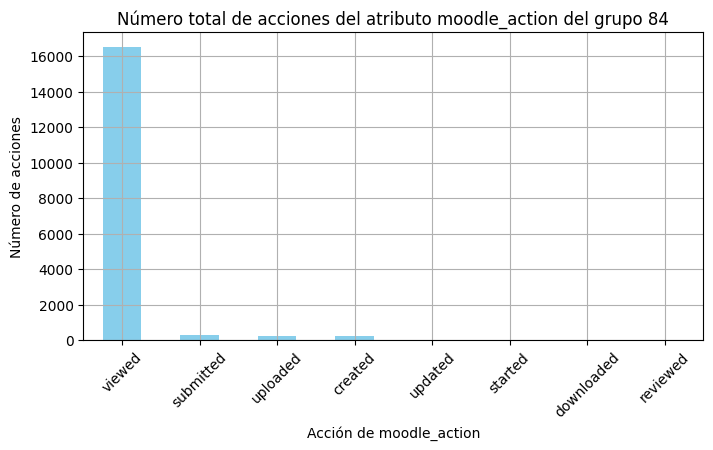

In [32]:
#Se cuentan los diferentes valores del atributo moodle_action.
acciones_test = df1_test['moodle_action'].value_counts()
#Se construye y se muestra el gráfico de barras del número total de cada acción del atributo moodle_action del grupo 84.
plt.figure(figsize=(8, 4))
acciones_test.plot(kind='bar', color='skyblue')
plt.title('Número total de acciones del atributo moodle_action del grupo 84')
plt.xlabel('Acción de moodle_action')
plt.ylabel('Número de acciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
#Contamos los 'submitted', 'uploaded' y 'created' del conjunto de entrenamiento
submitted_count = df1_train[df1_train['moodle_action'] == 'submitted'].shape[0]
uploaded_count = df1_train[df1_train['moodle_action'] == 'uploaded'].shape[0]
created_count = df1_train[df1_train['moodle_action'] == 'created'].shape[0]

submitted_count, uploaded_count, created_count

(1539, 1487, 1365)

In [34]:
#Contamos los 'submitted', 'uploaded' y 'created' del conjunto de prueba
submitted_count = df1_test[df1_test['moodle_action'] == 'submitted'].shape[0]
uploaded_count = df1_test[df1_test['moodle_action'] == 'uploaded'].shape[0]
created_count = df1_test[df1_test['moodle_action'] == 'created'].shape[0]

submitted_count, uploaded_count, created_count

(280, 249, 226)

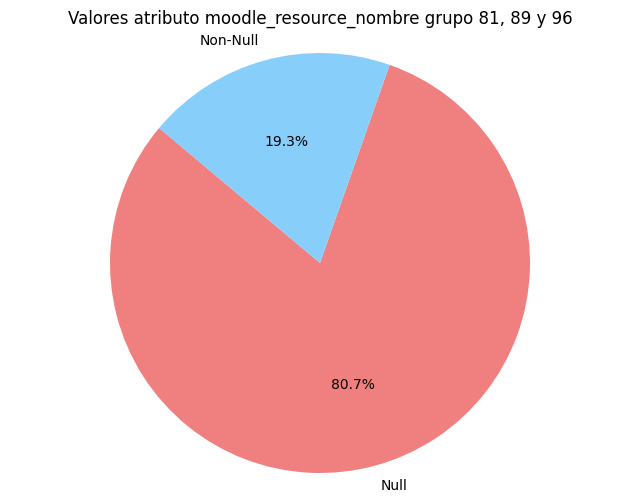

In [35]:
#Se calcula el número de valores null en 'moodle_resource_nombre'
null_count = df1_train['moodle_resource_nombre'].isnull().sum()
non_null_count = df1_train['moodle_resource_nombre'].notnull().sum()
total_rows = len(df1_train)

#Porcentaje de null y non-null
null_percentage = (null_count / total_rows) * 100
non_null_percentage = (non_null_count / total_rows) * 100
null_percentage, non_null_percentage

#Se muestra el pie-chart
labels = ['Null', 'Non-Null']
sizes = [null_percentage, non_null_percentage]
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Valores atributo moodle_resource_nombre grupo 81, 89 y 96')
plt.axis('equal')
plt.show()

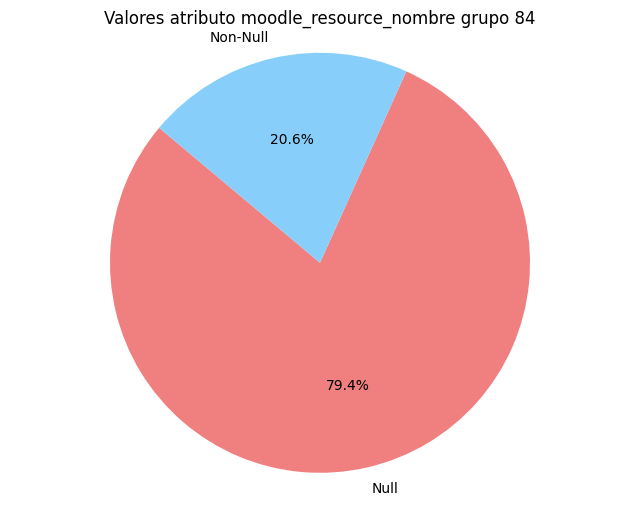

In [36]:
#Se calcula el número de valores null en 'moodle_resource_nombre'
null_count = df1_test['moodle_resource_nombre'].isnull().sum()
non_null_count = df1_test['moodle_resource_nombre'].notnull().sum()
total_rows = len(df1_test)

#Porcentaje de null y non-null
null_percentage = (null_count / total_rows) * 100
non_null_percentage = (non_null_count / total_rows) * 100
null_percentage, non_null_percentage

#Se muestra el pie-chart
labels = ['Null', 'Non-Null']
sizes = [null_percentage, non_null_percentage]
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Valores atributo moodle_resource_nombre grupo 84')
plt.axis('equal')
plt.show()

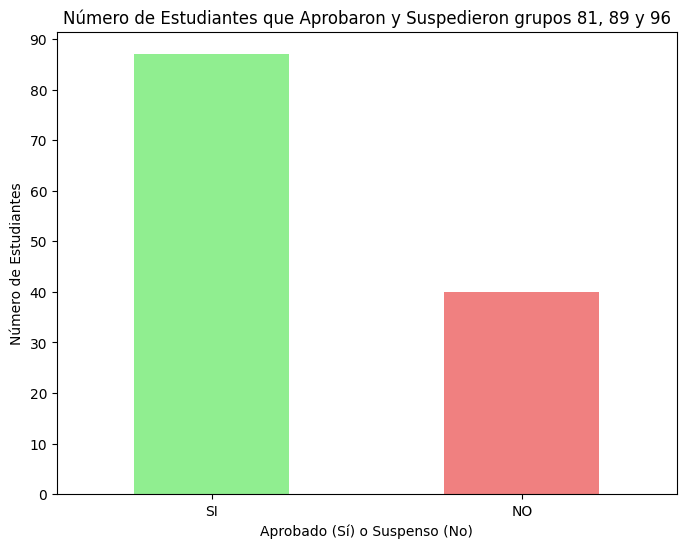

In [37]:
#Se carga el archivo 'notas_81_89_96'
df_81 = './Datos_TFG_originales/datos_correctos/notas_81_89_96.xlsx'
df_notas_81 = pd.read_excel(df_81)

#Se uenta el número de estudiantes que aprobaron y suspendieron
passed_count = df_notas_81['nota_final_aprobado'].value_counts()

#Se muestra la gráfica de barras
plt.figure(figsize=(8, 6))
passed_count.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Número de Estudiantes que Aprobaron y Suspedieron grupos 81, 89 y 96')
plt.xlabel('Aprobado (Sí) o Suspenso (No)')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

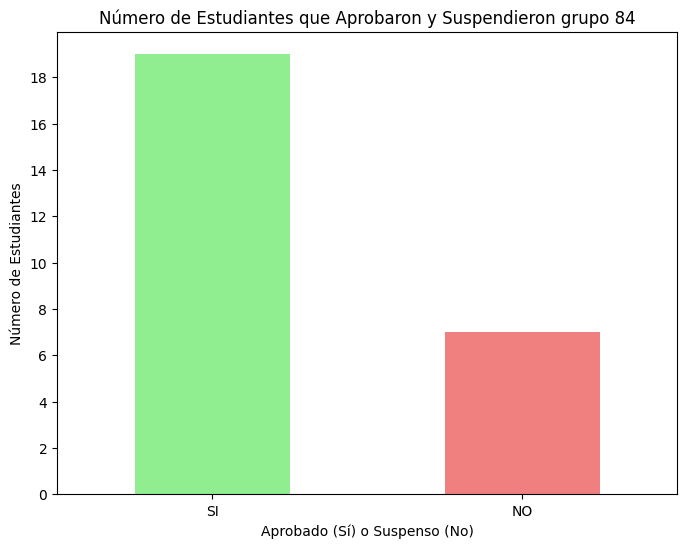

In [38]:
#Se carga el archivo 'notas_84'
df_84 = './Datos_TFG_originales/datos_correctos/notas_84.xlsx'
df_notas_84 = pd.read_excel(df_84)

#Se uenta el número de estudiantes que aprobaron y suspendieron
passed_count = df_notas_84['nota_final_aprobado'].value_counts()

#Se muestra la gráfica de barras
plt.figure(figsize=(8, 6))
passed_count.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Número de Estudiantes que Aprobaron y Suspendieron grupo 84')
plt.xlabel('Aprobado (Sí) o Suspenso (No)')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()